In [1]:
import re
from pprint import pprint
from typing import NamedTuple, Tuple, List

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, Image
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
text_path = './sherlock.txt'
text = open(text_path).read()

print(text[2000:2500])

versity of London, and proceeded to Netley to go through the course
prescribed for surgeons in the army. Having completed my studies there,
I was duly attached to the Fifth Northumberland Fusiliers as Assistant
Surgeon. The regiment was stationed in India at the time, and before
I could join it, the second Afghan war had broken out. On landing at
Bombay, I learned that my corps had advanced through the passes, and
was already deep in the enemy’s country. I followed, however, with many
other offi


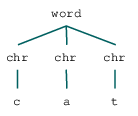

In [3]:
from nltk.tree import Tree
from IPython.display import display

tree = Tree.fromstring('(word (chr c) (chr a) (chr t))')
display(tree)

In [4]:
class Token(NamedTuple):
    type: str
    text: str
    match: Tuple[int, int]
        
    def update_type(self, new_type: str) -> 'Token':
        return Token(
            type=new_type,
            text=self.text,
            match=self.match
        )


In [5]:
import numpy as np

class Range(NamedTuple):
    start: int
    end: int
        
    def __repr__(self):
        return '(%s, %s)' % (self.start, self.end)
    
    def __contains__(self, other: 'Range'):
        return self.start <= other.start and self.end >= other.end

    def intersect(self, other: 'Range') -> 'Range':
        return Range(max(self.start, other.start), min(self.end, other.end))

a = Range(7, 10)
b = Range(6, 11)

a in b

True

In [6]:
tokens = []

patterns = {
    'word': re.compile(r'\b\w+\b'),
    'punct': re.compile(r'[.,\/#!$%\^&\*;:{}=\-_`~()]'),
    'caps': re.compile(r'[A-Z]'),
    'sent_end': re.compile(r'[.!?]'),
    'whitespace': re.compile(r'\s+')
}


for pat_type, pat in patterns.items():
    for m in re.finditer(pat, text):
        r = Range(m.span(0)[0], m.span(0)[1])
        tokens.append(Token(pat_type, m.group(0), r))
    
pprint(tokens[2000:2010])

[Token(type='word', text='strength', match=(11122, 11130)),
 Token(type='word', text='for', match=(11131, 11134)),
 Token(type='word', text='which', match=(11135, 11140)),
 Token(type='word', text='I', match=(11141, 11142)),
 Token(type='word', text='should', match=(11143, 11149)),
 Token(type='word', text='hardly', match=(11150, 11156)),
 Token(type='word', text='have', match=(11157, 11161)),
 Token(type='word', text='given', match=(11162, 11167)),
 Token(type='word', text='him', match=(11168, 11171)),
 Token(type='word', text='credit', match=(11172, 11178))]


In [7]:
def tokens_in_range(tokens: List[Token], rng: Range) -> List[Token]:
    results = []
    for t in tokens:
        if t.match in rng:
            results.append(t)
    return results


def sort_tokens(tokens: List[Token]) -> List[Token]:
    return sorted(tokens, key=lambda x: x.match.start)


sort_tokens(tokens_in_range(tokens, Range(2000, 2050)))


[Token(type='whitespace', text=' ', match=(2007, 2008)),
 Token(type='word', text='of', match=(2008, 2010)),
 Token(type='whitespace', text=' ', match=(2010, 2011)),
 Token(type='word', text='London', match=(2011, 2017)),
 Token(type='caps', text='L', match=(2011, 2012)),
 Token(type='punct', text=',', match=(2017, 2018)),
 Token(type='whitespace', text=' ', match=(2018, 2019)),
 Token(type='word', text='and', match=(2019, 2022)),
 Token(type='whitespace', text=' ', match=(2022, 2023)),
 Token(type='word', text='proceeded', match=(2023, 2032)),
 Token(type='whitespace', text=' ', match=(2032, 2033)),
 Token(type='word', text='to', match=(2033, 2035)),
 Token(type='whitespace', text=' ', match=(2035, 2036)),
 Token(type='word', text='Netley', match=(2036, 2042)),
 Token(type='caps', text='N', match=(2036, 2037)),
 Token(type='whitespace', text=' ', match=(2042, 2043)),
 Token(type='word', text='to', match=(2043, 2045)),
 Token(type='whitespace', text=' ', match=(2045, 2046)),
 Token(typ

In [8]:
def tokens_starting_at(tokens: List[Token], idx: int) -> List[Token]:
    results = []
    for t in tokens:
        if t.match.start == idx:
            results.append(t)
    return results

tokens_starting_at(tokens, 2011)


[Token(type='word', text='London', match=(2011, 2017)),
 Token(type='caps', text='L', match=(2011, 2012))]

In [9]:
def tokens_with_type(tokens: List[Token], type: str) -> List[Token]:
    results = []
    for t in tokens:
        if t.type == type:
            results.append(t)
    return results

words = tokens_with_type(tokens, 'word')
caps = tokens_with_type(tokens, 'caps')

cap_words = []
cap_indicies = [x.match.start for x in caps]
for word in words:
    if word.match.start in cap_indicies:
        cap_words.append(word.update_type('cap_word'))

tokens = tokens + cap_words

In [10]:
# sentence = r'(WHITESPACE WORD)+(SENT_END)'
print(text[2850: 3000])
print('---')
sort_tokens(tokens_in_range(tokens, Range(2880, 3000)))[:10]


t the fatal battle of
Maiwand. There I was struck on the shoulder by a Jezail bullet, which
shattered the bone and grazed the subclavian artery. I sho
---


[Token(type='whitespace', text=' ', match=(2880, 2881)),
 Token(type='word', text='There', match=(2881, 2886)),
 Token(type='caps', text='T', match=(2881, 2882)),
 Token(type='cap_word', text='There', match=(2881, 2886)),
 Token(type='whitespace', text=' ', match=(2886, 2887)),
 Token(type='word', text='I', match=(2887, 2888)),
 Token(type='caps', text='I', match=(2887, 2888)),
 Token(type='cap_word', text='I', match=(2887, 2888)),
 Token(type='whitespace', text=' ', match=(2888, 2889)),
 Token(type='word', text='was', match=(2889, 2892))]

In [11]:
def next_token(idx: int, tokens: List[Token]) -> List[List[Token]]:
    results = []
    while len(results) == 0 and idx < len(text):
        x = tokens_starting_at(tokens, idx)
        if len(x) > 0:
            results += x
        idx += 1
    return results
    
    
x = next_token(2887, tokens)

In [12]:
i = 2880
allowed_types = ['word']
while True:
    n = next_token(i, tokens)
    print(n)
    if len(n) == 1:
        i = n[0].match.end
    else:
        break
    

[Token(type='whitespace', text=' ', match=(2880, 2881))]
[Token(type='word', text='There', match=(2881, 2886)), Token(type='caps', text='T', match=(2881, 2882)), Token(type='cap_word', text='There', match=(2881, 2886))]


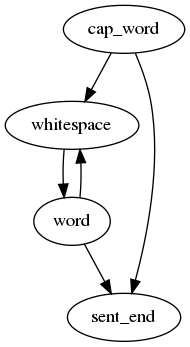

In [13]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph 

G = nx.MultiDiGraph()

G.add_node(0, label='cap_word')
G.add_node(1, label='word')
G.add_node(2, label='whitespace')
G.add_node(3, label='sent_end')

G.add_edge(0, 2)
G.add_edge(0, 3)
G.add_edge(1, 2)
G.add_edge(2, 1)
G.add_edge(1, 3)

A = to_agraph(G) 
A.layout('dot')                                                                 
A.draw('multi.png')
Image('multi.png')

In [189]:
def find_algo(nodes, algo: nx.MultiDiGraph, start_index:int = 0, algo_start_index=0):
    starts = []
    for x in algo.nodes:
        if len(algo.in_edges(x)) == 0:
            starts.append(x)

            
    potential_algo_steps = [algo_start_index]
    
    valid_types = set()
    for step_idx in potential_algo_steps:
        token_type = algo.nodes[step_idx]['label']
        valid_types.add(token_type)

    curr = next_token(start_index, nodes)
    curr_types = [x.type for x in curr]
#     print('>> Current Types:', curr_types)
#     print('>> Valid Type Options:', valid_types)
    valid_tokens = [x for x in curr if x.type in valid_types]
    if len(valid_tokens) == 0:
        print('>> Valid Type not found!')
        return []
#     print('>> Success! Found:', len(valid_tokens), 'token(s)')
    possibilities = []
    a = False
    for token in valid_tokens:
        print('>>', token.text)
#         print('>> Potential Steps', potential_algo_steps)
        for step_idx in potential_algo_steps:
            for nxt in algo.neighbors(step_idx):
                x = find_algo(nodes, algo, token.match.end, nxt)
                if len(x) > 0:
                    possibilities.append([[token] + p for p in x])
                    a = True
    if not a:
        possibilities.append([token])
#                 return []
    
    return possibilities


# find_algo(tokens, G, 2010)
# tokens_with_type(tokens, 'sent_end')[:100]
# t = sort_tokens(tokens_in_range(tokens, Range(3696, 4000)))
find_algo(sort_tokens(tokens), G, 0, 0)

# sort_tokens(tokens)[:100]

>> The
>>  
>> Project
>>  
>> Gutenberg
>>  
>> EBook
>>  
>> of
>>  
>> A
>>  
>> Study
>>  
>> In
>>  
>> Scarlet
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!
>> Valid Type not found!


[[[Token(type='cap_word', text='The', match=(1, 4)),
   [Token(type='whitespace', text=' ', match=(4, 5)),
    [Token(type='word', text='Project', match=(5, 12)),
     [Token(type='whitespace', text=' ', match=(12, 13)),
      [Token(type='word', text='Gutenberg', match=(13, 22)),
       [Token(type='whitespace', text=' ', match=(22, 23)),
        [Token(type='word', text='EBook', match=(23, 28)),
         [Token(type='whitespace', text=' ', match=(28, 29)),
          [Token(type='word', text='of', match=(29, 31)),
           [Token(type='whitespace', text=' ', match=(31, 32)),
            [Token(type='word', text='A', match=(32, 33)),
             [Token(type='whitespace', text=' ', match=(33, 34)),
              [Token(type='word', text='Study', match=(34, 39)),
               [Token(type='whitespace', text=' ', match=(39, 40)),
                [Token(type='word', text='In', match=(40, 42)),
                 [Token(type='whitespace', text=' ', match=(42, 43)),
                  Token